In [1239]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib 
matplotlib.rcParams['axes.unicode_minus'] = False
matplotlib.rcParams['font.family'] = "AppleGothic"
from IPython.display import Image

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from scipy import stats
import scipy 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from pycaret.regression import *
import catboost as cb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
import pandas_profiling
import statsmodels.api as sm
from sklearn.decomposition import PCA
from statsmodels.miscmodels.ordinal_model import OrderedModel

### 자료 소개

**`grid_250_data.csv`는 전주시를 250x250 나눈 후 인구와 공간적 데이터, 그리고 범죄주의구간(폭행, 절도, 성폭행) 등급의 강도로 구성되어있다.  
해당 데이터를 통해 전주시의 3대 범죄 발생에 영향을 끼치는 요인을 파악 후 범죄 위험지역에 대해 판단해 보려한다.** 

**데이터는 국가정보포털에서 격자별 인구 및 건축물에 대한 데이터를 수집하였으며, 가로등 주차장 등은 각 데이터의 좌표를 기준으로 격자내의 개수를 입력하였다.**  
**범죄주의구간은 생활안전지도의 치안사고발생현황을 바탕으로 만들어진 범죄주의구간 (1~10등급)의 지도를 이용하여 격자별 주의구간의 등급을 산정했다. (각 등급의 최대값)**  
자료는 총 43개의 변수로 구성되어 있으며, 격자는 총 918개이다. 

#### raw data
<code>gird_500</code> = 전주시 범죄관련 데이터
- <code>INDEX</code> = 인덱스
- <code>ID</code> = 각 격자의 고유 ID
- <code>총인구</code> = 격자별 총인구
- <code>고등여성인구</code> = 격자별 고등학생 여성인구(이 변수는 성폭력 취약인구에 포함)
- <code>20대여성인구</code> = 격자별 20대 여성인구(이 변수는 성폭력 취약인구에 포함)
- <code>유소년인구</code> = 격자별 유소년인구(0~14세)
- <code>고령인구</code> = 격자별 고령인구(65세 이상)
- <code>30년이상35년미만건축물</code> = 30년이상 35년미만건축물의 수 
- <code>35년이상건축물</code> = 35년이상 건축물 
- <code>개별주택가격</code> = 격자별 개별주택가격의 평균 
- <code>공시지가</code> = 격자별 평균 공시지가 
- <code>행정동코드</code> = 격자가 속한 행정동
- <code>가로등</code> = 격자별 가로등의 수 
- <code>공영주차장</code> = 격자별 공영주차장수
- <code>공중화장실</code> = 격자별 공중화장실수
- <code>교육시설</code> = 격자별 교육시설의 수 (학원, 어린이집)
- <code>대규모점포</code> = 격자별 대규모 점포의 수 (홈플러스, 이마트 등)
- <code>대부업현황</code> = 격자별 대부업체의 수
- <code>룸살롱</code> = 격자별 룸살롱의 수 
- <code>버스정류장</code> = 격자별 버스정류장의 수
- <code>보안등</code> = 격자별 보안등의 수
- <code>상가</code> = 격자별 상가의 수 (교육시설,음식점,술집,도소매업 오락시설을 포함한 상가의 수)
- <code>숙박업소</code> = 격자별 숙박업소의 수
- <code>술집</code> = 격자별 술집 (술집+룸살롱)
- <code>어린이보호</code> = 격자별 어린이보호구역의 수
- <code>어린이집</code> = 격자별 어린이집 수
- <code>오락시설</code> = 격자별 오락시설 (노래방, 당구장, pc방 등)
- <code>원룸_오피스텔</code> = 격자별 원룸 및 오피스텔의 수
- <code>음식점</code> = 격자별 음식점 수
- <code>자율방범대</code> = 격자별 자율방범대 수
- <code>파출소</code> = 격자별 파출소의 수
- <code>cctv</code> = 격자별 cctv 수
- <code>신호등</code> = 격자별 신호등의 수
- <code>횡단보도</code> = 격자별 횡단보도의 수
- <code>GRADE_폭력</code> = 격자별 폭력주의등급(2~11)
- <code>GRADE_절도</code> = 격자별 절도주의등급(2~11)
- <code>GRADE_성폭력</code> = 격자별 성폭력주의등급(2~11)


In [1240]:
grid_250 = pd.read_csv('/Users/gimdong-wan/Desktop/DataCampus/data/real_data/250grid_data.csv')

In [1241]:
grid_250 = grid_250.fillna(0)

In [1242]:
grid_250.head(3)

,INDEX,ID,총인구,고등여성인구,20대여성인구,유소년인구,고령인구,건축물(30_34),건축물(35),개별주택가격,공시지가,행정동코드,가로등,공영주차장,공중화장실,교육시설,대규모점포,대부업현황,룸살롱,버스정류장,보안등,상가,숙박업소,술집,어린이보호,어린이집,오락시설,원룸_오피스텔,음식점,자율방범대,파출소,cctv,신호등,횡단보도,GRADE_폭력,GRADE_절도,GRADE_성폭력
0,0,다마54ba65ab,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,30187,조촌동,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,다마54ba65ba,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,6860,조촌동,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,다마54bb65aa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,23000,조촌동,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [1243]:
grid_250['성폭력취약인구'] = grid_250['고등여성인구']+grid_250['20대여성인구']
grid_250['건축물(30_)'] = grid_250['건축물(30_34)']+grid_250['건축물(35)']
grid_250['GRADE_폭력'] = grid_250['GRADE_폭력'].apply(lambda x: x-1 if x>0 else x)
grid_250['GRADE_절도'] = grid_250['GRADE_절도'].apply(lambda x: x-1 if x>0 else x)
grid_250['GRADE_성폭력'] = grid_250['GRADE_성폭력'].apply(lambda x: x-1 if x>0 else x)
grid_250 = grid_250.drop(columns = ['20대여성인구','고등여성인구','INDEX'])

In [1244]:
grid_250.describe()

,총인구,유소년인구,고령인구,건축물(30_34),건축물(35),개별주택가격,공시지가,가로등,공영주차장,공중화장실,교육시설,대규모점포,대부업현황,룸살롱,버스정류장,보안등,상가,숙박업소,술집,어린이보호,어린이집,오락시설,원룸_오피스텔,음식점,자율방범대,파출소,cctv,신호등,횡단보도,GRADE_폭력,GRADE_절도,GRADE_성폭력,성폭력취약인구,건축물(30_)
count,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3.498000e+03,3.498000e+03,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000
mean,187.329903,21.478845,31.931961,1.466266,6.439394,6.437332e+07,1.939918e+05,4.222699,0.022870,0.092624,1.057176,0.010863,0.024871,0.078616,0.162664,2.918811,9.642367,0.118067,0.405660,0.070040,0.173528,0.236135,2.496855,3.412236,0.013722,0.005432,0.383648,1.086907,1.964265,0.716409,0.863065,0.303602,14.837050,7.905660
std,473.743383,68.857221,81.631053,6.952647,22.376389,1.322315e+08,3.246397e+05,9.141901,0.167549,0.437710,4.212492,0.116653,0.190447,1.083236,0.513597,7.977143,27.358086,0.986938,1.990783,0.329574,0.728062,1.114666,10.524947,10.804282,0.116352,0.073510,0.911770,2.897327,4.619727,1.550289,1.798659,1.104955,40.751853,25.614288
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,8.763250e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,5.299000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,49.000000,0.000000,15.000000,0.000000,1.000000,9.123202e+07,2.281718e+05,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000
max,3685.000000,754.000000,1081.000000,177.000000,252.000000,4.706000e+09,3.253211e+06,82.000000,3.000000,7.000000,81.000000,2.000000,4.000000,33.000000,5.000000,79.000000,541.000000,21.000000,32.000000,5.000000,11.000000,23.000000,206.000000,161.000000,1.000000,1.000000,7.000000,26.000000,56.000000,10.000000,10.000000,10.000000,357.000000,259.000000


### 행정동별로 평균 범죄주의구간 등급 확인

In [1245]:
#grid_250[['GRADE_폭력','GRADE_절도','GRADE_성폭력']].groupby(grid_250['행정동코드']).mean().sort_values('GRADE_폭력', ascending=False)
#grid_250[['GRADE_폭력','GRADE_절도','GRADE_성폭력']].groupby(grid_250['행정동코드']).mean().sort_values('GRADE_절도', ascending=False)
#grid_250[['GRADE_폭력','GRADE_절도','GRADE_성폭력']].groupby(grid_250['행정동코드']).mean().sort_values('GRADE_성폭력', ascending=False)
dong_rank = grid_250[['GRADE_폭력','GRADE_절도','GRADE_성폭력']].groupby(grid_250['행정동코드']).mean()
dong_rank.mean(axis=1).sort_values(ascending=False)

행정동코드
금암1동     5.000000
인후3동     3.357143
효자3동     3.309524
중앙동      3.277778
인후1동     3.000000
삼천2동     2.962963
인후2동     2.666667
중화산2동    2.626667
진북동      2.500000
금암2동     2.400000
효자2동     2.333333
서신동      2.316667
평화1동     2.235294
삼천1동     2.083333
중화산1동    1.983333
우아1동     1.809524
풍남동      1.806452
노송동      1.747475
완산동      1.725490
덕진동      1.646091
효자5동     1.488215
송천1동     1.255411
효자1동     1.083333
효자4동     0.610687
혁신동      0.544974
송천2동     0.479167
팔복동      0.469136
평화2동     0.434457
서서학동     0.423077
여의동      0.323420
호성동      0.302158
우아2동     0.300938
삼천3동     0.125261
조촌동      0.089655
동서학동     0.058458
dtype: float64

### 랭킹 
- 폭력
    - 금암1동, 인후3동, 인후1동, 인후2동, 중앙동
- 절도
    - 금암1동, 중앙동, 효자3동, 삼천2동, 인후2동
- 성폭력
    - 금암1동, 효자3동, 인후3동, 효자2동, 삼천2동
- 평균
    - 금암1동, 인후3동, 효자3동, 인후1동, 중앙동

In [1246]:
grid_250.columns

Index(['ID', '총인구', '유소년인구', '고령인구', '건축물(30_34)', '건축물(35)', '개별주택가격', '공시지가',
       '행정동코드', '가로등', '공영주차장', '공중화장실', '교육시설', '대규모점포', '대부업현황', '룸살롱',
       '버스정류장', '보안등', '상가', '숙박업소', '술집', '어린이보호', '어린이집', '오락시설', '원룸_오피스텔',
       '음식점', '자율방범대', '파출소', 'cctv', '신호등', '횡단보도', 'GRADE_폭력', 'GRADE_절도',
       'GRADE_성폭력', '성폭력취약인구', '건축물(30_)'],
      dtype='object')

In [1247]:
len(grid_250.query('GRADE_폭력==0 & GRADE_절도==0 & GRADE_성폭력==0'))

2434

In [1248]:
len(grid_250.query('GRADE_폭력!=0 & GRADE_절도!=0 & GRADE_성폭력!=0'))

273

In [1249]:
len(grid_250.query('GRADE_폭력!=0 | GRADE_절도!=0 | GRADE_성폭력!=0'))

1064

- 타겟이 모두 0인 로우 2434개
- 타겟이 모두 0보다 큰 로우 273개
- 타겟이 하나라도 0보다 큰 로우 1064개

In [1250]:
feat_N = grid_250[(grid_250['총인구']==0)&(grid_250['건축물(30_34)']==0)&(grid_250['건축물(35)']==0)&(grid_250['가로등']==0)&(grid_250['공영주차장']==0)&(grid_250['공중화장실']==0)&(grid_250['숙박업소']==0)
        &(grid_250['대규모점포']==0)&(grid_250['대부업현황']==0)&(grid_250['상가']==0)&(grid_250['어린이보호']==0)&(grid_250['원룸_오피스텔']==0)&(grid_250['cctv']==0)&(grid_250['신호등']==0)&(grid_250['횡단보도']==0)
        &(grid_250['버스정류장']==0)&(grid_250['개별주택가격']==0)] #target 제외 모든 변수가 0인 row
feat_Y = grid_250[(grid_250['총인구']>0)|(grid_250['건축물(30_34)']>0)|(grid_250['건축물(35)']>0)|(grid_250['가로등']>0)|(grid_250['공영주차장']>0)|(grid_250['공중화장실']>0)|(grid_250['숙박업소']>0)
        |(grid_250['대규모점포']>0)|(grid_250['대부업현황']>0)|(grid_250['상가']>0)|(grid_250['어린이보호']>0)|(grid_250['원룸_오피스텔']>0)|(grid_250['cctv']>0)|(grid_250['신호등']>0)|(grid_250['횡단보도']>0)
        |(grid_250['버스정류장']>0)|(grid_250['개별주택가격']>0)] #target 제외 모든 변수가 0보다 큰 row


In [1251]:
print(len(grid_250),len(feat_N),len(feat_Y))

3498 1460 2038


- 모든 피쳐가 0인 행이 `1460`개이고, 한 피쳐라도 0보다 큰 행은 `2038`개 (공시지가와 타겟 제외)

In [1252]:
print(len(grid_250[grid_250['GRADE_폭력']>0]),len(grid_250[grid_250['GRADE_절도']>0]),len(grid_250[grid_250['GRADE_성폭력']>0]))
print(len(feat_N[feat_N['GRADE_폭력']>0]),len(feat_N[feat_N['GRADE_절도']>0]),len(feat_N[feat_N['GRADE_성폭력']>0]))

900 836 303
19 13 4


- 폭력등급이 0보다 큰 로우는 900개, 절도 등급이 0보다 큰 로우는 836개, 성폭력 등급이 0보다 큰 로우는 303개가 있다. 
- 모든 피쳐가 0임에도 불구하고(1460개의 피쳐), 폭력등급이 있는 로우는 19개, 절도 13개, 성폭력 4개가 있었다.

### 피쳐가 없는 격자들 지도에서 탐색해보기

In [1253]:
feat_N_ID = list(feat_N['ID'])

In [1254]:
out = open('/Users/gimdong-wan/Desktop/out.txt','w')

In [1255]:
print(feat_N_ID,file = out)

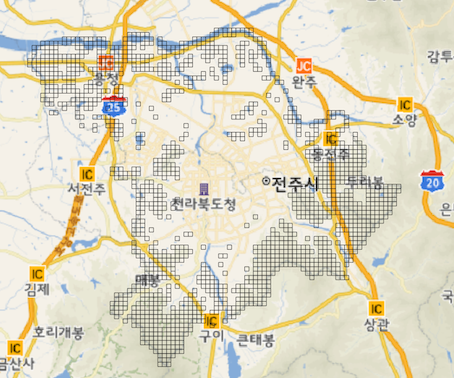

In [1256]:
Image("/Users/gimdong-wan/Desktop/DataCampus/img/feat_N_grid/전체.png")

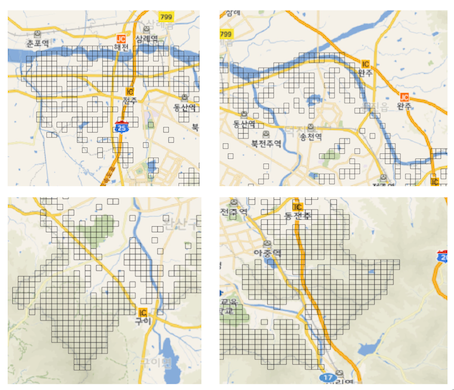

In [1257]:
Image("/Users/gimdong-wan/Desktop/DataCampus/img/feat_N_grid/확대.png")

#### 해당 격자들은 대부분 산지나, 강, 도로 등 시설물이 없는 곳들을 나타낸다.  
#### 따라서 본 연구는 범죄에 영향을 미치는 요인을 파악하기 위함이므로 제거해도 좋을 것 이라 판단된다.

In [1258]:
new_grid = feat_Y

In [1259]:
new_grid.columns

Index(['ID', '총인구', '유소년인구', '고령인구', '건축물(30_34)', '건축물(35)', '개별주택가격', '공시지가',
       '행정동코드', '가로등', '공영주차장', '공중화장실', '교육시설', '대규모점포', '대부업현황', '룸살롱',
       '버스정류장', '보안등', '상가', '숙박업소', '술집', '어린이보호', '어린이집', '오락시설', '원룸_오피스텔',
       '음식점', '자율방범대', '파출소', 'cctv', '신호등', '횡단보도', 'GRADE_폭력', 'GRADE_절도',
       'GRADE_성폭력', '성폭력취약인구', '건축물(30_)'],
      dtype='object')

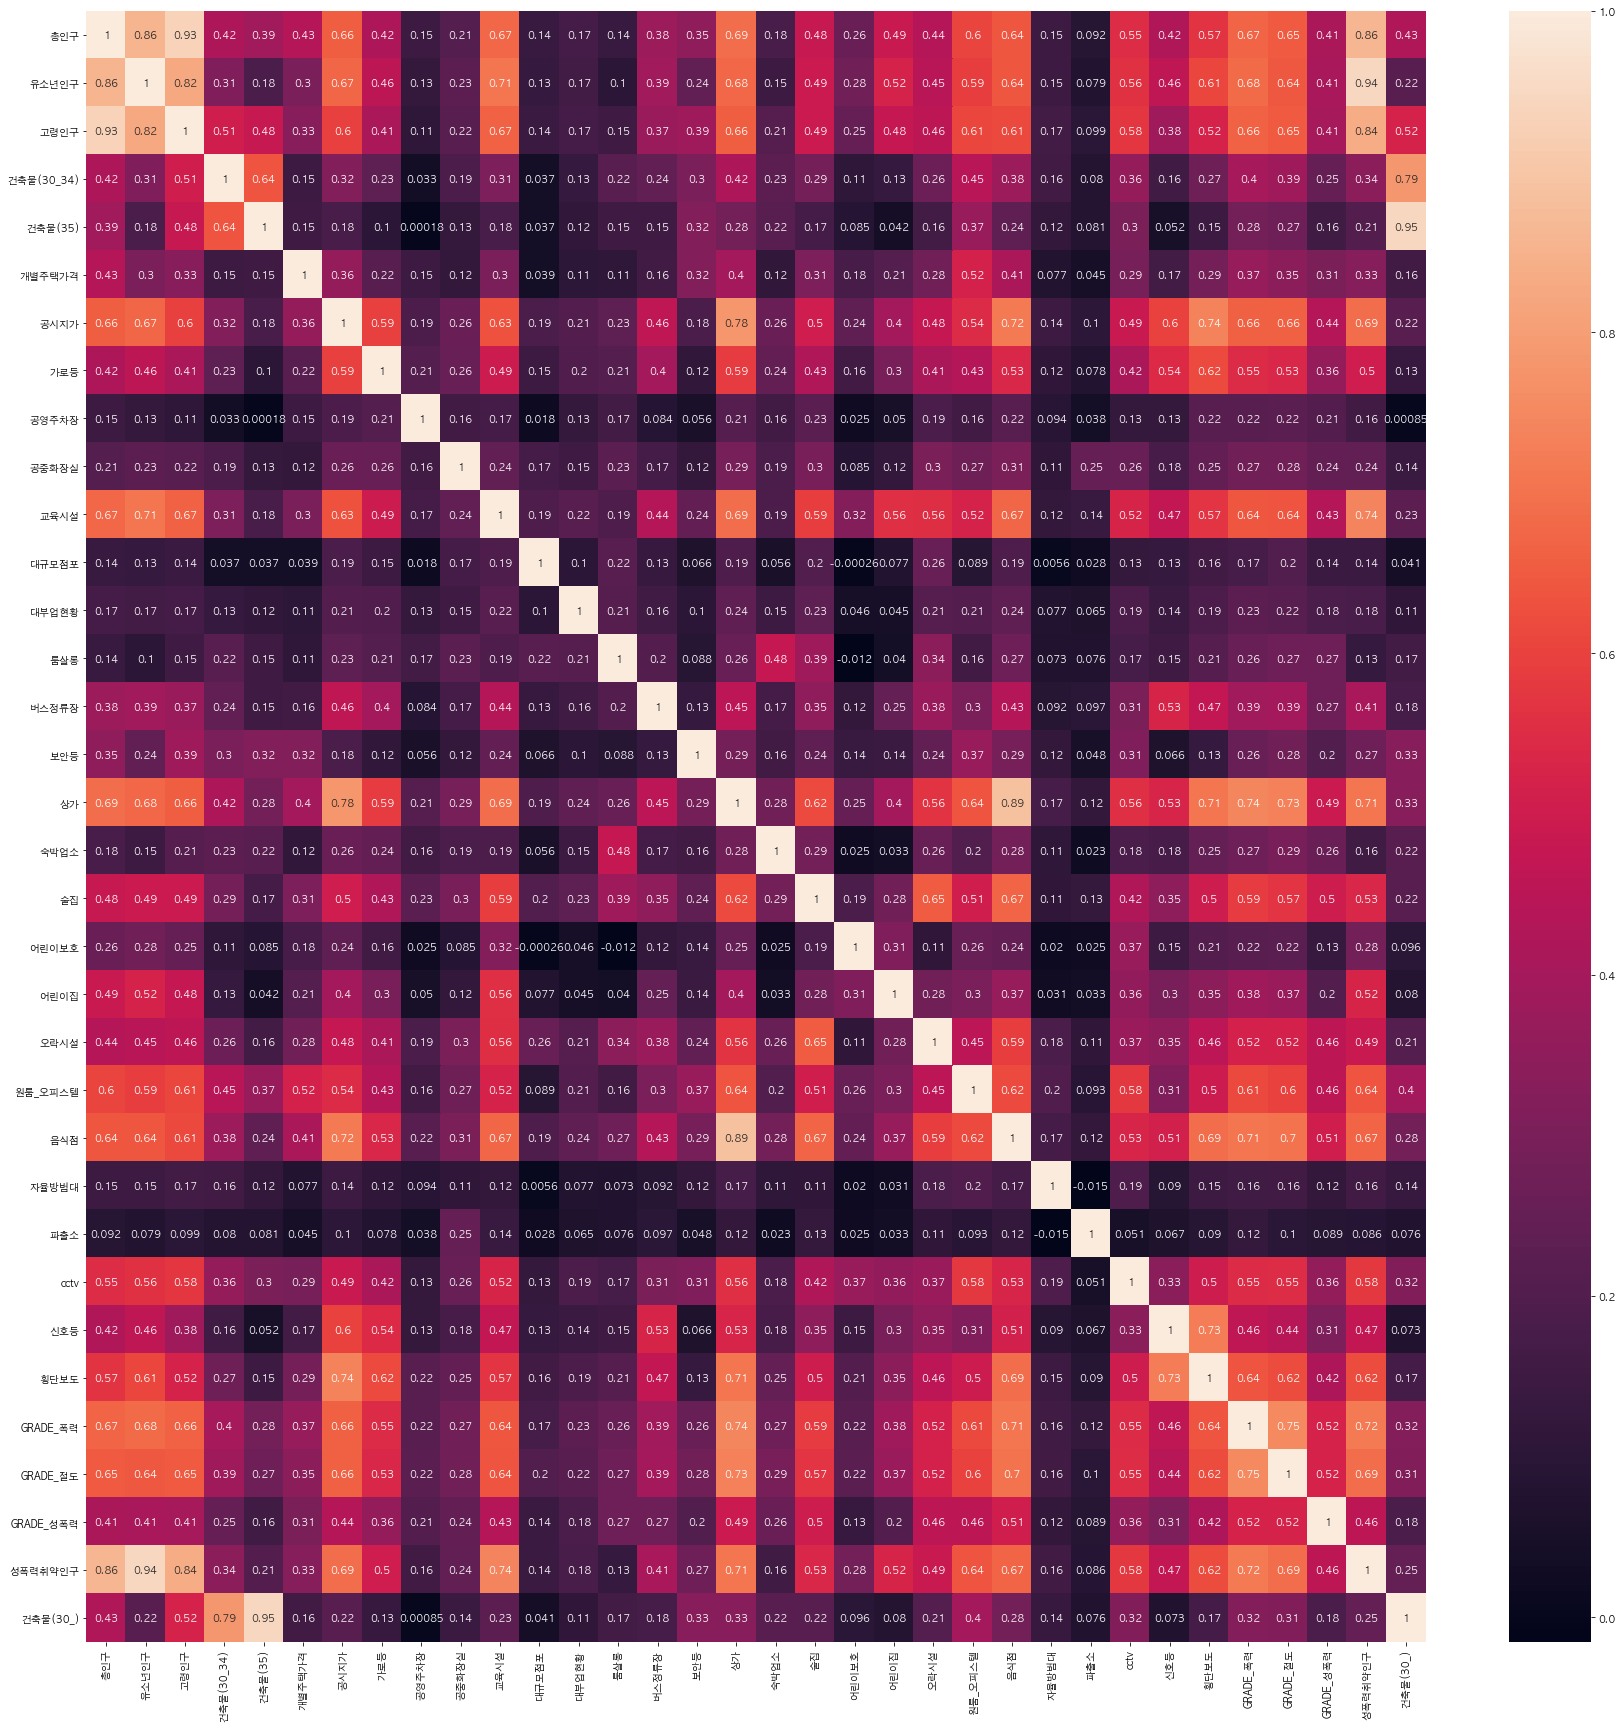

In [1260]:
plt.figure(figsize=(30, 30))
sns.heatmap(new_grid.corr(method = 'spearman'), annot=True)
plt.show()

### 전체 변수 간 상관관계 
 - 인구 사회학적 변수는 변수간 상관관계가 크며, 이는 다중공선성 제거를 위해 변수를 선택할 필요가 있다. 또한, 대부분 범죄 등급과도 큰 상관관계를 보이고 있다. 

#### 종속변수 (3대범죄)를 기반으로 한 상관계수 확인
 - 폭력
     - `인구` : 총인구 (0.67),성폭력취약인구(0.72), 유소년인구(0.68), 고령인구(0.66)
     - `토지` : 30년 이상35년 미만 건축물(0.39), 35년 이상건축물(0.27), 30년 이상 건축물 (0.32),개별주택가격 (0.37), 공시지가(0.66)
     - `시설물` : 가로등(0.55), 공영주차장(0.22), 공중화장실(0.27), 교육시설(0.64), 대규모점포(0.17), 대부업체현황(0.23), 룸살롱(0.26), 버스정류장(0.39), 보안등(0.26), 상가(0.74), 숙박업소(0.27), 술집(0.59), 어린이보호구역(0.22), 어린이집(0.38), 오락시설(0.52), 원룸_오피스텔(0.6), 음식점(0.7), 자율방범대(0.16), 파출소(0.1), cctv(0.55), 신호등(0.44), 횡단보도(0.62),
     - `다른 범죄` : 절도(0.75), 성폭력(0.52)

 - 절도
     - `인구` : 총인구 (0.65),성폭력취약인구(0.69), 유소년인구(0.64), 고령인구(0.65)
     - `토지` : 30년 이상35년 미만 건축물(0.39), 35년 이상건축물(0.27), 30년 이상 건축물 (0.31),개별주택가격 (0.31), 공시지가(0.44)
     - `시설물` : 가로등(0.53), 공영주차장(0.22), 공중화장실(0.28), 교육시설(0.64), 대규모점포(0.2), 대부업체현황(0.22), 룸살롱(0.27), 버스정류장(0.39), 보안등(0.28), 상가(0.73), 숙박업소(0.29), 술집(0.57), 어린이보호구역(0.22), 어린이집(0.37), 오락시설(0.52), 원룸_오피스텔(0.36), 음식점(0.62), 자율방범대(0.11), 파출소(0.01), cctv(0.51), 신호등(0.33), 횡단보도(0.53),
     - `다른 범죄` : 폭력(0.74), 성폭력(0.55)

 - 성폭력
     - `인구` : 총인구 (0.41),성폭력취약인구(0.46), 유소년인구(0.41), 고령인구(0.41)
     - `토지` : 30년 이상35년 미만 건축물(0.25), 35년 이상건축물(0.16), 30년 이상 건축물 (0.18),개별주택가격 (0.31), 공시지가(0.44)
     - `시설물` : 가로등(0.36), 공영주차장(0.21), 공중화장실(0.24), 교육시설(0.43), 대규모점포(0.14), 대부업체현황(0.18), 룸살롱(0.28), 버스정류장(0.27), 보안등(0.2), 상가(0.49), 숙박업소(0.26), 술집(0.5), 어린이보호구역(0.13), 어린이집(0.2), 오락시설(0.46), 원룸_오피스텔(0.46), 음식점(0.51), 자율방범대(0.12), 파출소(0.09), cctv(0.36), 신호등(0.31), 횡단보도(0.42),
     - `다른 범죄` : 폭력(0.52), 절도(0.52)

### 폭력 범죄 발생지/미발생지 t-test

In [1261]:
violence_Y = new_grid[new_grid['GRADE_폭력']>0]
violence_N = new_grid[new_grid['GRADE_폭력']==0]
print('폭력 발생지 로우 수 :',len(violence_Y),'폭력 미발생지 로우 수 :',len(violence_N))

폭력 발생지 로우 수 : 881 폭력 미발생지 로우 수 : 1157


x1_mean :  653.4233825198638 / x2_mean :  68.81071737251513


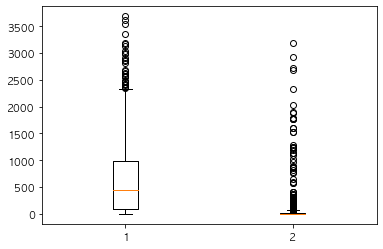

LeveneResult(statistic=630.6174961805651, pvalue=1.8521074513482068e-121)


Ttest_indResult(statistic=23.31562829588057, pvalue=5.705550331021199e-98)

In [1262]:
x1 = np.array(violence_Y['총인구'])
x2 = np.array(violence_N['총인구'])
print('x1_mean : ',x1.mean(),'/ x2_mean : ',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(np.array(violence_Y['총인구']), np.array(violence_N['총인구'])))
scipy.stats.ttest_ind(np.array(violence_Y['총인구']), np.array(violence_N['총인구']), equal_var=False)

##### 총인구수에는 유의한 차이를 보인다, 하지만 이상치들도 꽤 많음을 알 수 있음 

x1_mean :  53.751418842224744 / x2_mean :  3.9282627484874677


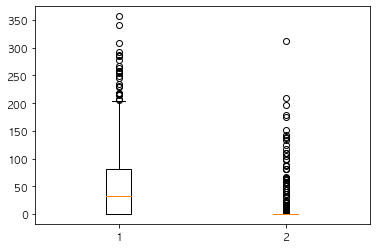

LeveneResult(statistic=706.9280499928796, pvalue=5.953937003980363e-134)


Ttest_indResult(statistic=22.50883935346372, pvalue=1.4341170365572102e-91)

In [1263]:
x1 = np.array(violence_Y['성폭력취약인구'])
x2 = np.array(violence_N['성폭력취약인구'])
print('x1_mean : ',x1.mean(),'/ x2_mean : ',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(np.array(violence_Y['성폭력취약인구']), np.array(violence_N['성폭력취약인구'])))
scipy.stats.ttest_ind(np.array(violence_Y['성폭력취약인구']), np.array(violence_N['성폭력취약인구']), equal_var=False)

##### 성폭력 취약인구수에는 유의한 차이를 보인다, 하지만 이상치들도 꽤 많음을 알 수 있음 

x1_mean :  71.41657207718502 / x2_mean :  10.557476231633535


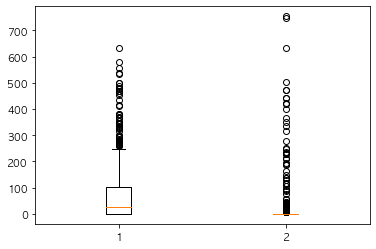

LeveneResult(statistic=255.3097855811734, pvalue=3.1101266983759085e-54)


Ttest_indResult(statistic=15.620425687686074, pvalue=1.157222657582151e-50)

In [1264]:
x1 = np.array(violence_Y['유소년인구'])
x2 = np.array(violence_N['유소년인구'])
print('x1_mean : ',x1.mean(),'/ x2_mean : ',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(np.array(violence_Y['유소년인구']), np.array(violence_N['유소년인구'])))
scipy.stats.ttest_ind(np.array(violence_Y['유소년인구']), np.array(violence_N['유소년인구']), equal_var=False)

##### 유소년 취약인구수에는 유의한 차이를 보인다, 하지만 이상치들도 꽤 많음을 알 수 있음 

x1_mean :  113.8422247446084 / x2_mean :  9.855661192739845


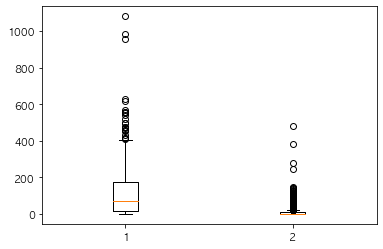

LeveneResult(statistic=688.4483322370056, pvalue=5.85809740877868e-131)


Ttest_indResult(statistic=23.68717376674369, pvalue=8.668519108707626e-98)

In [1265]:
x1 = np.array(violence_Y['고령인구'])
x2 = np.array(violence_N['고령인구'])
print('x1_mean : ',x1.mean(),'/ x2_mean : ',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(np.array(violence_Y['고령인구']), np.array(violence_N['고령인구'])))
scipy.stats.ttest_ind(np.array(violence_Y['고령인구']), np.array(violence_N['고령인구']), equal_var=False)

##### 고령인구수에는 유의한 차이를 보인다, 하지만 이상치들도 꽤 많음을 알 수 있음 

x1_mean :  5.316685584562997 / x2_mean :  0.38461538461538464


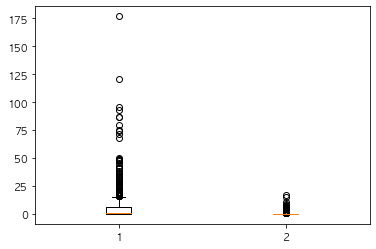

LeveneResult(statistic=172.7584809419383, pvalue=6.183744087405323e-38)


Ttest_indResult(statistic=11.182956137344513, pvalue=2.92649856556718e-27)

In [1266]:
x1 = np.array(violence_Y['건축물(30_34)'])
x2 = np.array(violence_N['건축물(30_34)'])
print('x1_mean : ',x1.mean(),'/ x2_mean : ',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(np.array(violence_Y['건축물(30_34)']), np.array(violence_N['건축물(30_34)'])))
scipy.stats.ttest_ind(np.array(violence_Y['건축물(30_34)']), np.array(violence_N['건축물(30_34)']), equal_var=False)

##### 건축물(30~34년) 유의한 차이를 보인다

x1_mean :  22.2360953461975 / x2_mean :  2.536732929991357


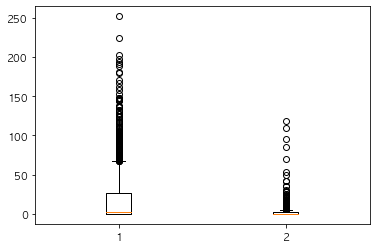

LeveneResult(statistic=276.8242353516493, pvalue=2.2155952219160905e-58)


Ttest_indResult(statistic=14.544541630235175, pvalue=2.3655989326505094e-43)

In [1267]:
x1 = np.array(violence_Y['건축물(35)'])
x2 = np.array(violence_N['건축물(35)'])
print('x1_mean : ',x1.mean(),'/ x2_mean : ',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(np.array(violence_Y['건축물(35)']), np.array(violence_N['건축물(35)'])))
scipy.stats.ttest_ind(np.array(violence_Y['건축물(35)']), np.array(violence_N['건축물(35)']), equal_var=False)

##### 35년이상 건축물 유의한 차이를 보인다, 하지만 이상치들도 꽤 많음을 알 수 있음 

x1_mean :  27.5527809307605 / x2_mean :  2.9213483146067416


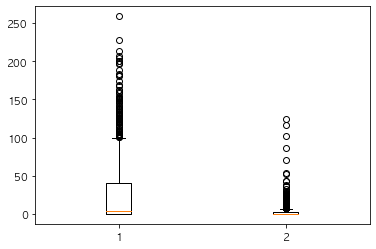

LeveneResult(statistic=350.7828581490364, pvalue=2.425984736637258e-72)


Ttest_indResult(statistic=16.16822278549921, pvalue=5.3712202881339736e-52)

In [1268]:
x1 = np.array(violence_Y['건축물(30_)'])
x2 = np.array(violence_N['건축물(30_)'])
print('x1_mean : ',x1.mean(),'/ x2_mean : ',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(np.array(violence_Y['건축물(30_)']), np.array(violence_N['건축물(30_)'])))
scipy.stats.ttest_ind(np.array(violence_Y['건축물(30_)']), np.array(violence_N['건축물(30_)']), equal_var=False)

##### 30년이상 건축물에서 유의한 차이를 보인다, 하지만 이상치들도 꽤 많음을 알 수 있음 

x1_mean :  153276168.86833143 / x2_mean :  77909735.4883319


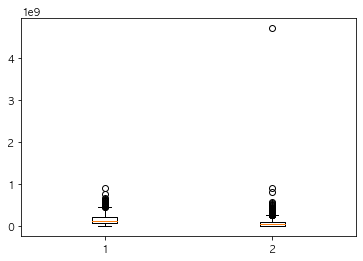

LeveneResult(statistic=37.91540040063005, pvalue=8.875870338290034e-10)


Ttest_indResult(statistic=11.254687453928026, pvalue=1.5251471906193718e-28)

In [1269]:
x1 = np.array(violence_Y['개별주택가격'])
x2 = np.array(violence_N['개별주택가격'])
print('x1_mean : ',x1.mean(),'/ x2_mean : ',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(np.array(violence_Y['개별주택가격']), np.array(violence_N['개별주택가격'])))
scipy.stats.ttest_ind(np.array(violence_Y['개별주택가격']), np.array(violence_N['개별주택가격']), equal_var=False)

##### 개별주택가격에서 유의한 차이를 보인다. (2배정도)

x1_mean :  541687.1191827469 / x2_mean :  142005.3794295592


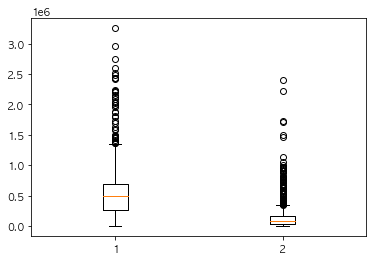

LeveneResult(statistic=248.53315472615907, pvalue=6.41844583470993e-53)


Ttest_indResult(statistic=25.507344880155433, pvalue=4.377028931336266e-115)

In [1270]:
x1 = np.array(violence_Y['공시지가'])
x2 = np.array(violence_N['공시지가'])
print('x1_mean : ',x1.mean(),'/ x2_mean : ',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(np.array(violence_Y['공시지가']), np.array(violence_N['공시지가'])))
scipy.stats.ttest_ind(np.array(violence_Y['공시지가']), np.array(violence_N['공시지가']), equal_var=False)

##### 가로등수에서도 유의한 차이를 보인다, 하지만 이상치들도 꽤 많음을 알 수 있음 

x1_mean :  0.08286038592508513 / x2_mean :  0.006050129645635264


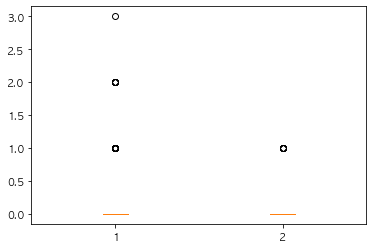

LeveneResult(statistic=63.975665075297265, pvalue=2.092746878088575e-15)


Ttest_indResult(statistic=7.090314448539257, pvalue=2.589021983527182e-12)

In [1271]:
x1 = np.array(violence_Y['공영주차장'])
x2 = np.array(violence_N['공영주차장'])
print('x1_mean : ',x1.mean(),'/ x2_mean : ',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(np.array(violence_Y['공영주차장']), np.array(violence_N['공영주차장'])))
scipy.stats.ttest_ind(np.array(violence_Y['공영주차장']), np.array(violence_N['공영주차장']), equal_var=False)

In [1272]:
len(new_grid[new_grid['공영주차장']>0])

71

##### 공영주차장에서도 차이를 보인다 할 수 있으나, 주차장 자체가 많지 않다.

x1_mean :  0.29511918274687854 / x2_mean :  0.055315471045808126


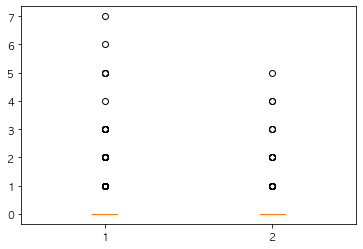

LeveneResult(statistic=94.491548969382, pvalue=7.292662100961811e-22)


Ttest_indResult(statistic=8.897140100271358, pvalue=2.1495193567957458e-18)

In [1273]:
x1 = np.array(violence_Y['공중화장실'])
x2 = np.array(violence_N['공중화장실'])
print('x1_mean : ',x1.mean(),'/ x2_mean : ',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(np.array(violence_Y['공중화장실']), np.array(violence_N['공중화장실'])))
scipy.stats.ttest_ind(np.array(violence_Y['공중화장실']), np.array(violence_N['공중화장실']), equal_var=False)

In [1274]:
len(new_grid[new_grid['공중화장실']>0])

214

##### 공중화장실 수에서 유의한 차이를 보인다. 하지만 큰 차이가 있다고 보기 어려울 것 같다.   

x1_mean :  4.039727582292849 / x2_mean :  0.11668107173725151


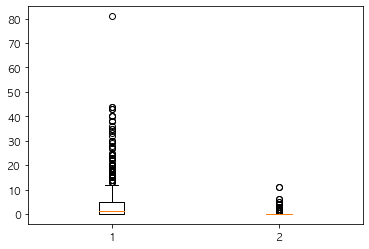

LeveneResult(statistic=310.9469773817554, pvalue=7.054375203946592e-65)


Ttest_indResult(statistic=15.244054321921706, pvalue=8.531168391294286e-47)

In [1275]:
x1 = np.array(violence_Y['교육시설'])
x2 = np.array(violence_N['교육시설'])
print('x1_mean : ',x1.mean(),'/ x2_mean : ',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(np.array(violence_Y['교육시설']), np.array(violence_N['교육시설'])))
scipy.stats.ttest_ind(np.array(violence_Y['교육시설']), np.array(violence_N['교육시설']), equal_var=False)

##### 교육시설 수에서 유의한 차이를 보인다. 

x1_mean :  0.043132803632236094 / x2_mean :  0.0


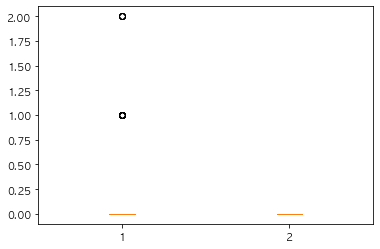

LeveneResult(statistic=40.86447075634436, pvalue=2.0172650861130595e-10)


Ttest_indResult(statistic=5.577772527771285, pvalue=3.242169807167729e-08)

In [1276]:
x1 = np.array(violence_Y['대규모점포'])
x2 = np.array(violence_N['대규모점포'])
print('x1_mean : ',x1.mean(),'/ x2_mean : ',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(np.array(violence_Y['대규모점포']), np.array(violence_N['대규모점포'])))
scipy.stats.ttest_ind(np.array(violence_Y['대규모점포']), np.array(violence_N['대규모점포']), equal_var=False)

#### 폭력사건은 대규모 점포가 있는 격자에서만 발생했다.

x1_mean :  0.09648127128263337 / x2_mean :  0.001728608470181504


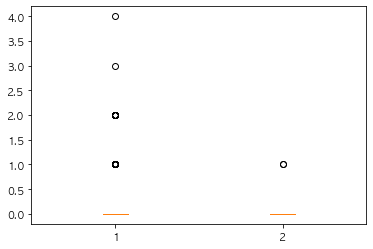

LeveneResult(statistic=75.68581094185167, pvalue=6.728137440461043e-18)


Ttest_indResult(statistic=7.6174395495626355, pvalue=6.562955990391309e-14)

In [1277]:
x1 = np.array(violence_Y['대부업현황'])
x2 = np.array(violence_N['대부업현황'])
print('x1_mean : ',x1.mean(),'/ x2_mean : ',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(np.array(violence_Y['대부업현황']), np.array(violence_N['대부업현황'])))
scipy.stats.ttest_ind(np.array(violence_Y['대부업현황']), np.array(violence_N['대부업현황']), equal_var=False)

x1_mean :  0.5402951191827469 / x2_mean :  0.08038029386343994


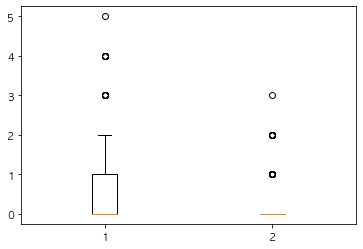

LeveneResult(statistic=287.06297109282997, pvalue=2.430719371694712e-60)


Ttest_indResult(statistic=15.3601749151792, pvalue=2.2364915913172147e-48)

In [1278]:
x1 = np.array(violence_Y['버스정류장'])
x2 = np.array(violence_N['버스정류장'])
print('x1_mean : ',x1.mean(),'/ x2_mean : ',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(np.array(violence_Y['버스정류장']), np.array(violence_N['버스정류장'])))
scipy.stats.ttest_ind(np.array(violence_Y['버스정류장']), np.array(violence_N['버스정류장']), equal_var=False)

#### 비교적 버스정류장이 있는 곳에서 범죄가 발생했다

x1_mean :  8.503972758229285 / x2_mean :  2.171132238547969


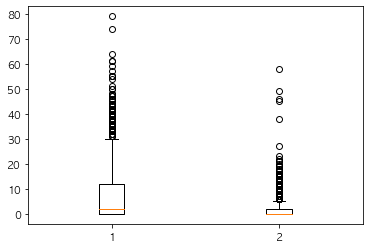

LeveneResult(statistic=234.74324643473193, pvalue=3.127332909090005e-50)


Ttest_indResult(statistic=13.483013426779547, pvalue=2.3782780273689913e-38)

In [1279]:
x1 = np.array(violence_Y['보안등'])
x2 = np.array(violence_N['보안등'])
print('x1_mean : ',x1.mean(),'/ x2_mean : ',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(np.array(violence_Y['보안등']), np.array(violence_N['보안등'])))
scipy.stats.ttest_ind(np.array(violence_Y['보안등']), np.array(violence_N['보안등']), equal_var=False)

#### 비교적 버스정류장이 있는 곳에서 범죄가 발생했다

x1_mean :  35.894438138479 / x2_mean :  1.8202247191011236


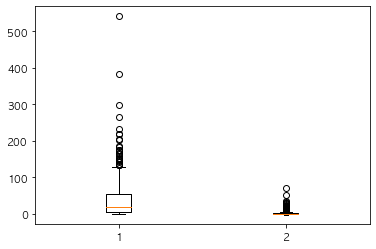

LeveneResult(statistic=590.871763537854, pvalue=8.274486880897929e-115)


Ttest_indResult(statistic=22.399888596314053, pvalue=1.513449861814134e-88)

In [1280]:
x1 = np.array(violence_Y['상가'])
x2 = np.array(violence_N['상가'])
print('x1_mean : ',x1.mean(),'/ x2_mean : ',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(np.array(violence_Y['상가']), np.array(violence_N['상가'])))
scipy.stats.ttest_ind(np.array(violence_Y['상가']), np.array(violence_N['상가']), equal_var=False)

#### 상가수에는 꽤 큰 차이를 보인다

x1_mean :  0.4426787741203178 / x2_mean :  0.019878997407087293


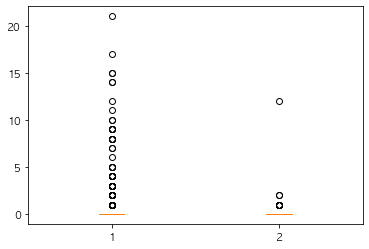

LeveneResult(statistic=55.46605431292107, pvalue=1.396529645880303e-13)


Ttest_indResult(statistic=6.56532656541147, pvalue=8.61090023786731e-11)

In [1281]:
x1 = np.array(violence_Y['숙박업소'])
x2 = np.array(violence_N['숙박업소'])
print('x1_mean : ',x1.mean(),'/ x2_mean : ',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(np.array(violence_Y['숙박업소']), np.array(violence_N['숙박업소'])))
scipy.stats.ttest_ind(np.array(violence_Y['숙박업소']), np.array(violence_N['숙박업소']), equal_var=False)

x1_mean :  1.5788876276958002 / x2_mean :  0.024200518582541054


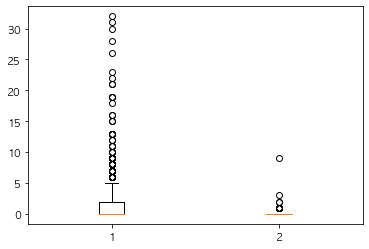

LeveneResult(statistic=201.1199834460131, pvalue=1.319997485600776e-43)


Ttest_indResult(statistic=12.397450531949964, pvalue=1.136036689108353e-32)

In [1282]:
x1 = np.array(violence_Y['술집'])
x2 = np.array(violence_N['술집'])
print('x1_mean : ',x1.mean(),'/ x2_mean : ',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(np.array(violence_Y['술집']), np.array(violence_N['술집'])))
scipy.stats.ttest_ind(np.array(violence_Y['술집']), np.array(violence_N['술집']), equal_var=False)

x1_mean :  0.2133938706015891 / x2_mean :  0.049265341400172864


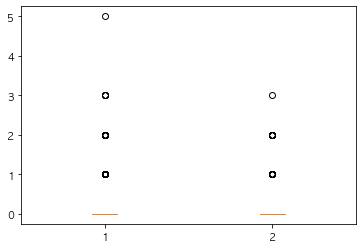

LeveneResult(statistic=77.4742160917047, pvalue=2.8110068334379582e-18)


Ttest_indResult(statistic=8.08464936338632, pvalue=1.5244959294476502e-15)

In [1283]:
x1 = np.array(violence_Y['어린이보호'])
x2 = np.array(violence_N['어린이보호'])
print('x1_mean : ',x1.mean(),'/ x2_mean : ',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(np.array(violence_Y['어린이보호']), np.array(violence_N['어린이보호'])))
scipy.stats.ttest_ind(np.array(violence_Y['어린이보호']), np.array(violence_N['어린이보호']), equal_var=False)

x1_mean :  0.6072644721906924 / x2_mean :  0.06136560069144339


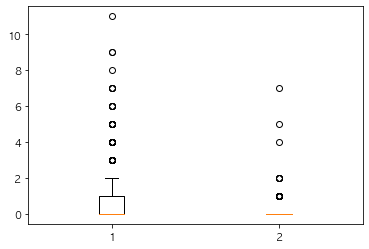

LeveneResult(statistic=186.31639787959043, pvalue=1.1772093715647592e-40)


Ttest_indResult(statistic=12.148540271986205, pvalue=9.615992574860679e-32)

In [1284]:
x1 = np.array(violence_Y['어린이집'])
x2 = np.array(violence_N['어린이집'])
print('x1_mean : ',x1.mean(),'/ x2_mean : ',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(np.array(violence_Y['어린이집']), np.array(violence_N['어린이집'])))
scipy.stats.ttest_ind(np.array(violence_Y['어린이집']), np.array(violence_N['어린이집']), equal_var=False)

x1_mean :  0.9182746878547106 / x2_mean :  0.014693171996542784


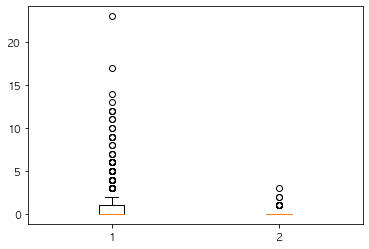

LeveneResult(statistic=218.97385709513884, pvalue=3.8871230777409566e-47)


Ttest_indResult(statistic=12.930878416504262, pvalue=3.6371834016066037e-35)

In [1285]:
x1 = np.array(violence_Y['오락시설'])
x2 = np.array(violence_N['오락시설'])
print('x1_mean : ',x1.mean(),'/ x2_mean : ',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(np.array(violence_Y['오락시설']), np.array(violence_N['오락시설'])))
scipy.stats.ttest_ind(np.array(violence_Y['오락시설']), np.array(violence_N['오락시설']), equal_var=False)

x1_mean :  9.488081725312146 / x2_mean :  0.324114088159032


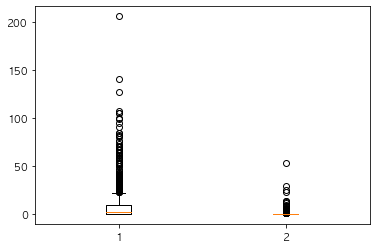

LeveneResult(statistic=265.04236042320855, pvalue=4.089756334257251e-56)


Ttest_indResult(statistic=14.104938319158764, pvalue=5.860202811601118e-41)

In [1286]:
x1 = np.array(violence_Y['원룸_오피스텔'])
x2 = np.array(violence_N['원룸_오피스텔'])
print('x1_mean : ',x1.mean(),'/ x2_mean : ',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(np.array(violence_Y['원룸_오피스텔']), np.array(violence_N['원룸_오피스텔'])))
scipy.stats.ttest_ind(np.array(violence_Y['원룸_오피스텔']), np.array(violence_N['원룸_오피스텔']), equal_var=False)

x1_mean :  12.779795686719638 / x2_mean :  0.5851339671564391


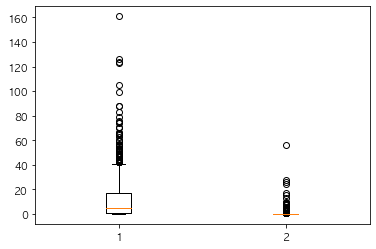

LeveneResult(statistic=476.3454977047109, pvalue=4.5988802500113914e-95)


Ttest_indResult(statistic=19.550444023126627, pvalue=2.8541015115632734e-71)

In [1287]:
x1 = np.array(violence_Y['음식점'])
x2 = np.array(violence_N['음식점'])
print('x1_mean : ',x1.mean(),'/ x2_mean : ',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(np.array(violence_Y['음식점']), np.array(violence_N['음식점'])))
scipy.stats.ttest_ind(np.array(violence_Y['음식점']), np.array(violence_N['음식점']), equal_var=False)

x1_mean :  0.04767309875141884 / x2_mean :  0.005185825410544511


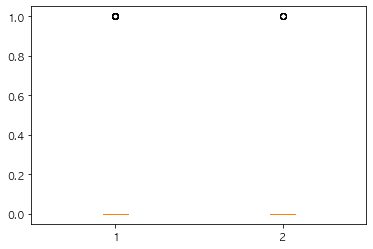

LeveneResult(statistic=39.990612923793506, pvalue=3.1276574747799904e-10)


Ttest_indResult(statistic=5.674861281879838, pvalue=1.8020710156360002e-08)

In [1288]:
x1 = np.array(violence_Y['자율방범대'])
x2 = np.array(violence_N['자율방범대'])
print('x1_mean : ',x1.mean(),'/ x2_mean : ',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(np.array(violence_Y['자율방범대']), np.array(violence_N['자율방범대'])))
scipy.stats.ttest_ind(np.array(violence_Y['자율방범대']), np.array(violence_N['자율방범대']), equal_var=False)

x1_mean :  0.021566401816118047 / x2_mean :  0.0


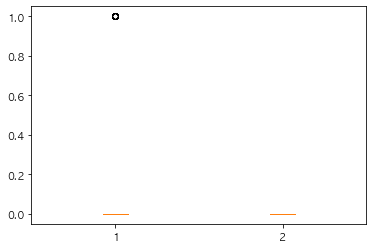

LeveneResult(statistic=25.47729337483406, pvalue=4.874135762325902e-07)


Ttest_indResult(statistic=4.4041743539668365, pvalue=1.1925303172605495e-05)

In [1289]:
x1 = np.array(violence_Y['파출소'])
x2 = np.array(violence_N['파출소'])
print('x1_mean : ',x1.mean(),'/ x2_mean : ',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(np.array(violence_Y['파출소']), np.array(violence_N['파출소'])))
scipy.stats.ttest_ind(np.array(violence_Y['파출소']), np.array(violence_N['파출소']), equal_var=False)

x1_mean :  1.2780930760499432 / x2_mean :  0.18668971477960242


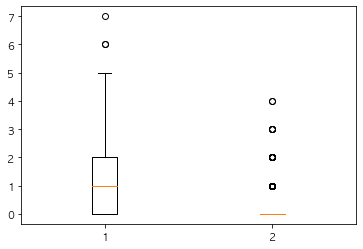

LeveneResult(statistic=684.2021687717303, pvalue=2.873056453068963e-130)


Ttest_indResult(statistic=22.500149826512036, pvalue=7.245008611438394e-92)

In [1290]:
x1 = np.array(violence_Y['cctv'])
x2 = np.array(violence_N['cctv'])
print('x1_mean : ',x1.mean(),'/ x2_mean : ',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(np.array(violence_Y['cctv']), np.array(violence_N['cctv'])))
scipy.stats.ttest_ind(np.array(violence_Y['cctv']), np.array(violence_N['cctv']), equal_var=False)

x1_mean :  3.3200908059023835 / x2_mean :  0.7579948141745895


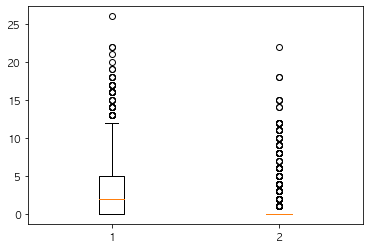

LeveneResult(statistic=377.23222148604196, pvalue=3.1566360829127477e-77)


Ttest_indResult(statistic=15.81134206828599, pvalue=1.430987374352228e-51)

In [1291]:
x1 = np.array(violence_Y['신호등'])
x2 = np.array(violence_N['신호등'])
print('x1_mean : ',x1.mean(),'/ x2_mean : ',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(np.array(violence_Y['신호등']), np.array(violence_N['신호등'])))
scipy.stats.ttest_ind(np.array(violence_Y['신호등']), np.array(violence_N['신호등']), equal_var=False)

x1_mean :  6.451759364358684 / x2_mean :  1.0259291270527227


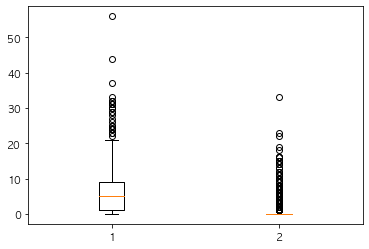

LeveneResult(statistic=488.63504081265484, pvalue=3.1682129753493154e-97)


Ttest_indResult(statistic=22.201592118439642, pvalue=1.0217885781138099e-90)

In [1292]:
x1 = np.array(violence_Y['횡단보도'])
x2 = np.array(violence_N['횡단보도'])
print('x1_mean : ',x1.mean(),'/ x2_mean : ',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(np.array(violence_Y['횡단보도']), np.array(violence_N['횡단보도'])))
scipy.stats.ttest_ind(np.array(violence_Y['횡단보도']), np.array(violence_N['횡단보도']), equal_var=False)

In [1293]:
numerical_feats = new_grid.dtypes[new_grid.dtypes != "object"].index.tolist()
numerical_feats.remove('GRADE_폭력')
numerical_feats.remove('GRADE_절도')
numerical_feats.remove('GRADE_성폭력')
print("Number of Numerical features: ", len(numerical_feats))

categorical_feats = new_grid.dtypes[new_grid.dtypes == "object"].index.tolist()
print("Number of Categorical features: ", len(categorical_feats))

Number of Numerical features:  31
Number of Categorical features:  2


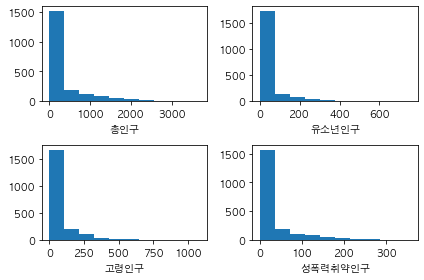

In [1294]:
plt.subplot(221)
plt.hist(new_grid['총인구'])
plt.xlabel('총인구')

plt.subplot(222)
plt.hist(new_grid['유소년인구'])
plt.xlabel('유소년인구')

plt.subplot(223)
plt.hist(new_grid['고령인구'])
plt.xlabel('고령인구')

plt.subplot(224)
plt.hist(new_grid['성폭력취약인구'])
plt.xlabel('성폭력취약인구')

plt.tight_layout()
plt.show()

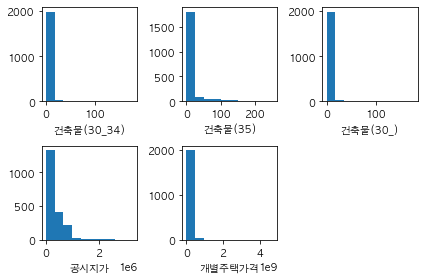

In [1295]:
plt.subplot(231)
plt.hist(new_grid['건축물(30_34)'])
plt.xlabel('건축물(30_34)')

plt.subplot(232)
plt.hist(new_grid['건축물(35)'])
plt.xlabel('건축물(35)')

plt.subplot(233)
plt.hist(new_grid['건축물(30_34)'])
plt.xlabel('건축물(30_)')

plt.subplot(234)
plt.hist(new_grid['공시지가'])
plt.xlabel('공시지가')

plt.subplot(235)
plt.hist(new_grid['개별주택가격'])
plt.xlabel('개별주택가격')

plt.tight_layout()
plt.show()

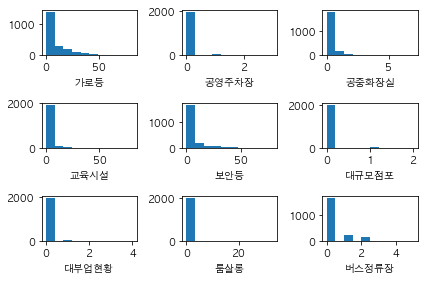

In [1296]:
plt.subplot(331)
plt.hist(new_grid['가로등'])
plt.xlabel('가로등')

plt.subplot(332)
plt.hist(new_grid['공영주차장'])
plt.xlabel('공영주차장')

plt.subplot(333)
plt.hist(new_grid['공중화장실'])
plt.xlabel('공중화장실')

plt.subplot(334)
plt.hist(new_grid['교육시설'])
plt.xlabel('교육시설')

plt.subplot(335)
plt.hist(new_grid['보안등'])
plt.xlabel('보안등')

plt.subplot(336)
plt.hist(new_grid['대규모점포'])
plt.xlabel('대규모점포')

plt.subplot(337)
plt.hist(new_grid['대부업현황'])
plt.xlabel('대부업현황')

plt.subplot(338)
plt.hist(new_grid['룸살롱'])
plt.xlabel('룸살롱')

plt.subplot(339)
plt.hist(new_grid['버스정류장'])
plt.xlabel('버스정류장')

plt.tight_layout()
plt.show()

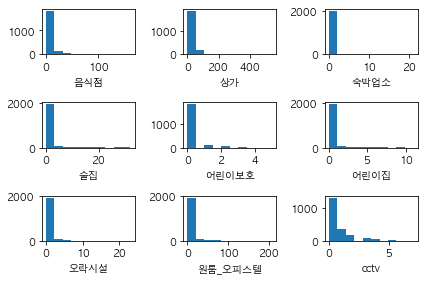

In [1297]:
plt.subplot(331)
plt.hist(new_grid['음식점'])
plt.xlabel('음식점')

plt.subplot(332)
plt.hist(new_grid['상가'])
plt.xlabel('상가')

plt.subplot(333)
plt.hist(new_grid['숙박업소'])
plt.xlabel('숙박업소')

plt.subplot(334)
plt.hist(new_grid['술집'])
plt.xlabel('술집')

plt.subplot(335)
plt.hist(new_grid['어린이보호'])
plt.xlabel('어린이보호')

plt.subplot(336)
plt.hist(new_grid['어린이집'])
plt.xlabel('어린이집')

plt.subplot(337)
plt.hist(new_grid['오락시설'])
plt.xlabel('오락시설')

plt.subplot(338)
plt.hist(new_grid['원룸_오피스텔'])
plt.xlabel('원룸_오피스텔')

plt.subplot(339)
plt.hist(new_grid['cctv'])
plt.xlabel('cctv')

plt.tight_layout()
plt.show()

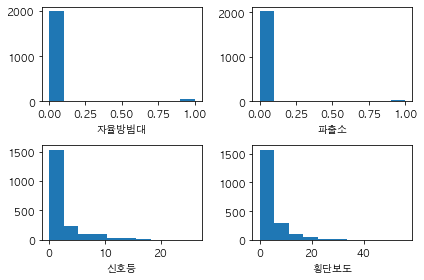

In [1298]:
plt.subplot(221)
plt.hist(new_grid['자율방범대'])
plt.xlabel('자율방범대')

plt.subplot(222)
plt.hist(new_grid['파출소'])
plt.xlabel('파출소')

plt.subplot(223)
plt.hist(new_grid['신호등'])
plt.xlabel('신호등')

plt.subplot(224)
plt.hist(new_grid['횡단보도'])
plt.xlabel('횡단보도')

plt.tight_layout()
plt.show()

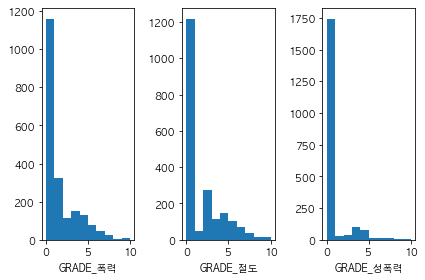

In [1299]:
plt.subplot(131)
plt.hist(new_grid['GRADE_폭력'])
plt.xlabel('GRADE_폭력')

plt.subplot(132)
plt.hist(new_grid['GRADE_절도'])
plt.xlabel('GRADE_절도')

plt.subplot(133)
plt.hist(new_grid['GRADE_성폭력'])
plt.xlabel('GRADE_성폭력')

plt.tight_layout()
plt.show()

In [1300]:
feature_list = list(new_grid.drop(columns = ['행정동코드','ID','GRADE_절도','GRADE_성폭력','GRADE_폭력']).columns)
feature = new_grid[feature_list]
target = new_grid[['GRADE_폭력']]

In [1200]:
print(len(new_grid[new_grid['GRADE_폭력']==0]))
print(len(new_grid[new_grid['GRADE_폭력']>0]))

1157
881


In [1201]:
violence_0 = new_grid.query('GRADE_폭력<1')
violence_1 = new_grid.query('GRADE_폭력<=2 & GRADE_폭력>=1')
violence_2 = new_grid.query('GRADE_폭력<5 & GRADE_폭력>=3')
violence_3 = new_grid.query('GRADE_폭력<=6 & GRADE_폭력>=5')
violence_4 = new_grid.query('GRADE_폭력<=8 & GRADE_폭력>=7')
violence_5 = new_grid.query('GRADE_폭력<=10 & GRADE_폭력>=9')

In [1202]:
print(len(violence_0),len(violence_1),len(violence_2),len(violence_3),len(violence_4),len(violence_5))

1157 438 280 124 30 9


In [1203]:
import scipy.stats as stats
import pandas as pd
import urllib
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [1204]:
violence_0 = new_grid.query('GRADE_폭력>=0 &GRADE_폭력<4')
violence_1 = new_grid.query('GRADE_폭력>=4 &GRADE_폭력<8')
violence_2 = new_grid.query('GRADE_폭력>=8 &GRADE_폭력<11')

In [1205]:
F_statistic, pVal = stats.f_oneway(violence_0['총인구'], violence_1['총인구'], violence_2['총인구'])

print('Altman 910 데이터의 일원분산분석 결과 : F={0:.1f}, p={1:.5f}'.format(F_statistic, pVal))
if pVal < 0.05:
    print('P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.')

Altman 910 데이터의 일원분산분석 결과 : F=142.0, p=0.00000
P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.


In [1206]:
new_grid.columns

Index(['ID', '총인구', '유소년인구', '고령인구', '건축물(30_34)', '건축물(35)', '개별주택가격', '공시지가',
       '행정동코드', '가로등', '공영주차장', '공중화장실', '교육시설', '대규모점포', '대부업현황', '룸살롱',
       '버스정류장', '보안등', '상가', '숙박업소', '술집', '어린이보호', '어린이집', '오락시설', '원룸_오피스텔',
       '음식점', '자율방범대', '파출소', 'cctv', '신호등', '횡단보도', 'GRADE_폭력', 'GRADE_절도',
       'GRADE_성폭력', '성폭력취약인구', '건축물(30_)'],
      dtype='object')

In [1207]:
def mean_compare(x,crime) : 
    for i in range(11) :
        print(crime,'등급이',i,'인 격자의 평균',x,':',new_grid.query('GRADE_'+crime+'=='+str(i))[x].mean())
    print('------------------------------------------------')

In [1208]:
mean_compare('총인구','폭력')

mean_compare('건축물(30_)','폭력')

mean_compare('개별주택가격','폭력')

mean_compare('공시지가','폭력')

mean_compare('가로등','폭력')

mean_compare('보안등','폭력')

mean_compare('공중화장실','폭력')

mean_compare('공영주차장','폭력')

mean_compare('교육시설','폭력')

mean_compare('대규모점포','폭력')

mean_compare('대부업현황','폭력')

mean_compare('룸살롱','폭력')

mean_compare('버스정류장','폭력')

mean_compare('상가','폭력')

mean_compare('숙박업소','폭력')

mean_compare('술집','폭력')

mean_compare('어린이보호','폭력')

mean_compare('어린이집','폭력')

mean_compare('오락시설','폭력')

mean_compare('원룸_오피스텔','폭력')

mean_compare('음식점','폭력')

mean_compare('자율방범대','폭력')

mean_compare('파출소','폭력')

mean_compare('cctv','폭력')

mean_compare('신호등','폭력')

mean_compare('횡단보도','폭력')

mean_compare('유소년인구','폭력')

mean_compare('고령인구','폭력')

폭력 등급이 0 인 격자의 평균 총인구 : 68.81071737251513
폭력 등급이 1 인 격자의 평균 총인구 : 341.26073619631904
폭력 등급이 2 인 격자의 평균 총인구 : 751.8392857142857
폭력 등급이 3 인 격자의 평균 총인구 : 928.7236842105264
폭력 등급이 4 인 격자의 평균 총인구 : 671.15625
폭력 등급이 5 인 격자의 평균 총인구 : 872.0632911392405
폭력 등급이 6 인 격자의 평균 총인구 : 1030.888888888889
폭력 등급이 7 인 격자의 평균 총인구 : 1159.96
폭력 등급이 8 인 격자의 평균 총인구 : 934.4
폭력 등급이 9 인 격자의 평균 총인구 : 529.0
폭력 등급이 10 인 격자의 평균 총인구 : 432.3333333333333
------------------------------------------------
폭력 등급이 0 인 격자의 평균 건축물(30_) : 2.9213483146067416
폭력 등급이 1 인 격자의 평균 건축물(30_) : 19.282208588957054
폭력 등급이 2 인 격자의 평균 건축물(30_) : 35.589285714285715
폭력 등급이 3 인 격자의 평균 건축물(30_) : 26.68421052631579
폭력 등급이 4 인 격자의 평균 건축물(30_) : 37.046875
폭력 등급이 5 인 격자의 평균 건축물(30_) : 33.55696202531646
폭력 등급이 6 인 격자의 평균 건축물(30_) : 28.57777777777778
폭력 등급이 7 인 격자의 평균 건축물(30_) : 40.36
폭력 등급이 8 인 격자의 평균 건축물(30_) : 6.6
폭력 등급이 9 인 격자의 평균 건축물(30_) : 5.333333333333333
폭력 등급이 10 인 격자의 평균 건축물(30_) : 34.833333333333336
-----------------------------------------

mean_compare('총인구','절도')

mean_compare('건축물(30_)','절도')

mean_compare('개별주택가격','절도')

mean_compare('공시지가','절도')

mean_compare('가로등','절도')

mean_compare('보안등','절도')

mean_compare('공중화장실','절도')

mean_compare('공영주차장','절도')

mean_compare('교육시설','절도')

mean_compare('대규모점포','절도')

mean_compare('대부업현황','절도')

mean_compare('룸살롱','절도')

mean_compare('버스정류장','절도')

mean_compare('상가','절도')

mean_compare('숙박업소','절도')

mean_compare('술집','절도')

mean_compare('어린이보호','절도')

mean_compare('어린이집','절도')

mean_compare('오락시설','절도')

mean_compare('원룸_오피스텔','절도')

mean_compare('음식점','절도')

mean_compare('자율방범대','절도')

mean_compare('파출소','절도')

mean_compare('cctv','절도')

mean_compare('신호등','절도')

mean_compare('횡단보도','절도')

mean_compare('유소년인구','절도')

mean_compare('고령인구','절도')

mean_compare('총인구','성폭력')

mean_compare('건축물(30_)','성폭력')

mean_compare('개별주택가격','성폭력')

mean_compare('공시지가','성폭력')

mean_compare('가로등','성폭력')

mean_compare('보안등','성폭력')

mean_compare('공중화장실','성폭력')

mean_compare('공영주차장','성폭력')

mean_compare('교육시설','성폭력')

mean_compare('대규모점포','성폭력')

mean_compare('대부업현황','성폭력')

mean_compare('룸살롱','성폭력')

mean_compare('버스정류장','성폭력')

mean_compare('상가','성폭력')

mean_compare('숙박업소','성폭력')

mean_compare('술집','성폭력')

mean_compare('어린이보호','성폭력')

mean_compare('어린이집','성폭력')

mean_compare('오락시설','성폭력')

mean_compare('원룸_오피스텔','성폭력')

mean_compare('음식점','성폭력')

mean_compare('자율방범대','성폭력')

mean_compare('파출소','성폭력')

mean_compare('cctv','성폭력')

mean_compare('신호등','성폭력')

mean_compare('횡단보도','성폭력')

mean_compare('유소년인구','성폭력')

mean_compare('고령인구','성폭력')
mean_compare('성폭력취약인구','성폭력')

In [1237]:
new_grid['폭력빈도'] = 0

In [1238]:
new_grid.loc[(new_grid['GRADE_폭력']==0),'폭력빈도'] = 0
new_grid.loc[(new_grid['GRADE_폭력']>0)&(new_grid['GRADE_폭력']<4),'폭력빈도'] = 1
new_grid.loc[(new_grid['GRADE_폭력']>=4)&(new_grid['GRADE_폭력']<8),'폭력빈도'] = 2
new_grid.loc[(new_grid['GRADE_폭력']>=8)&(new_grid['GRADE_폭력']<11),'폭력빈도'] = 3

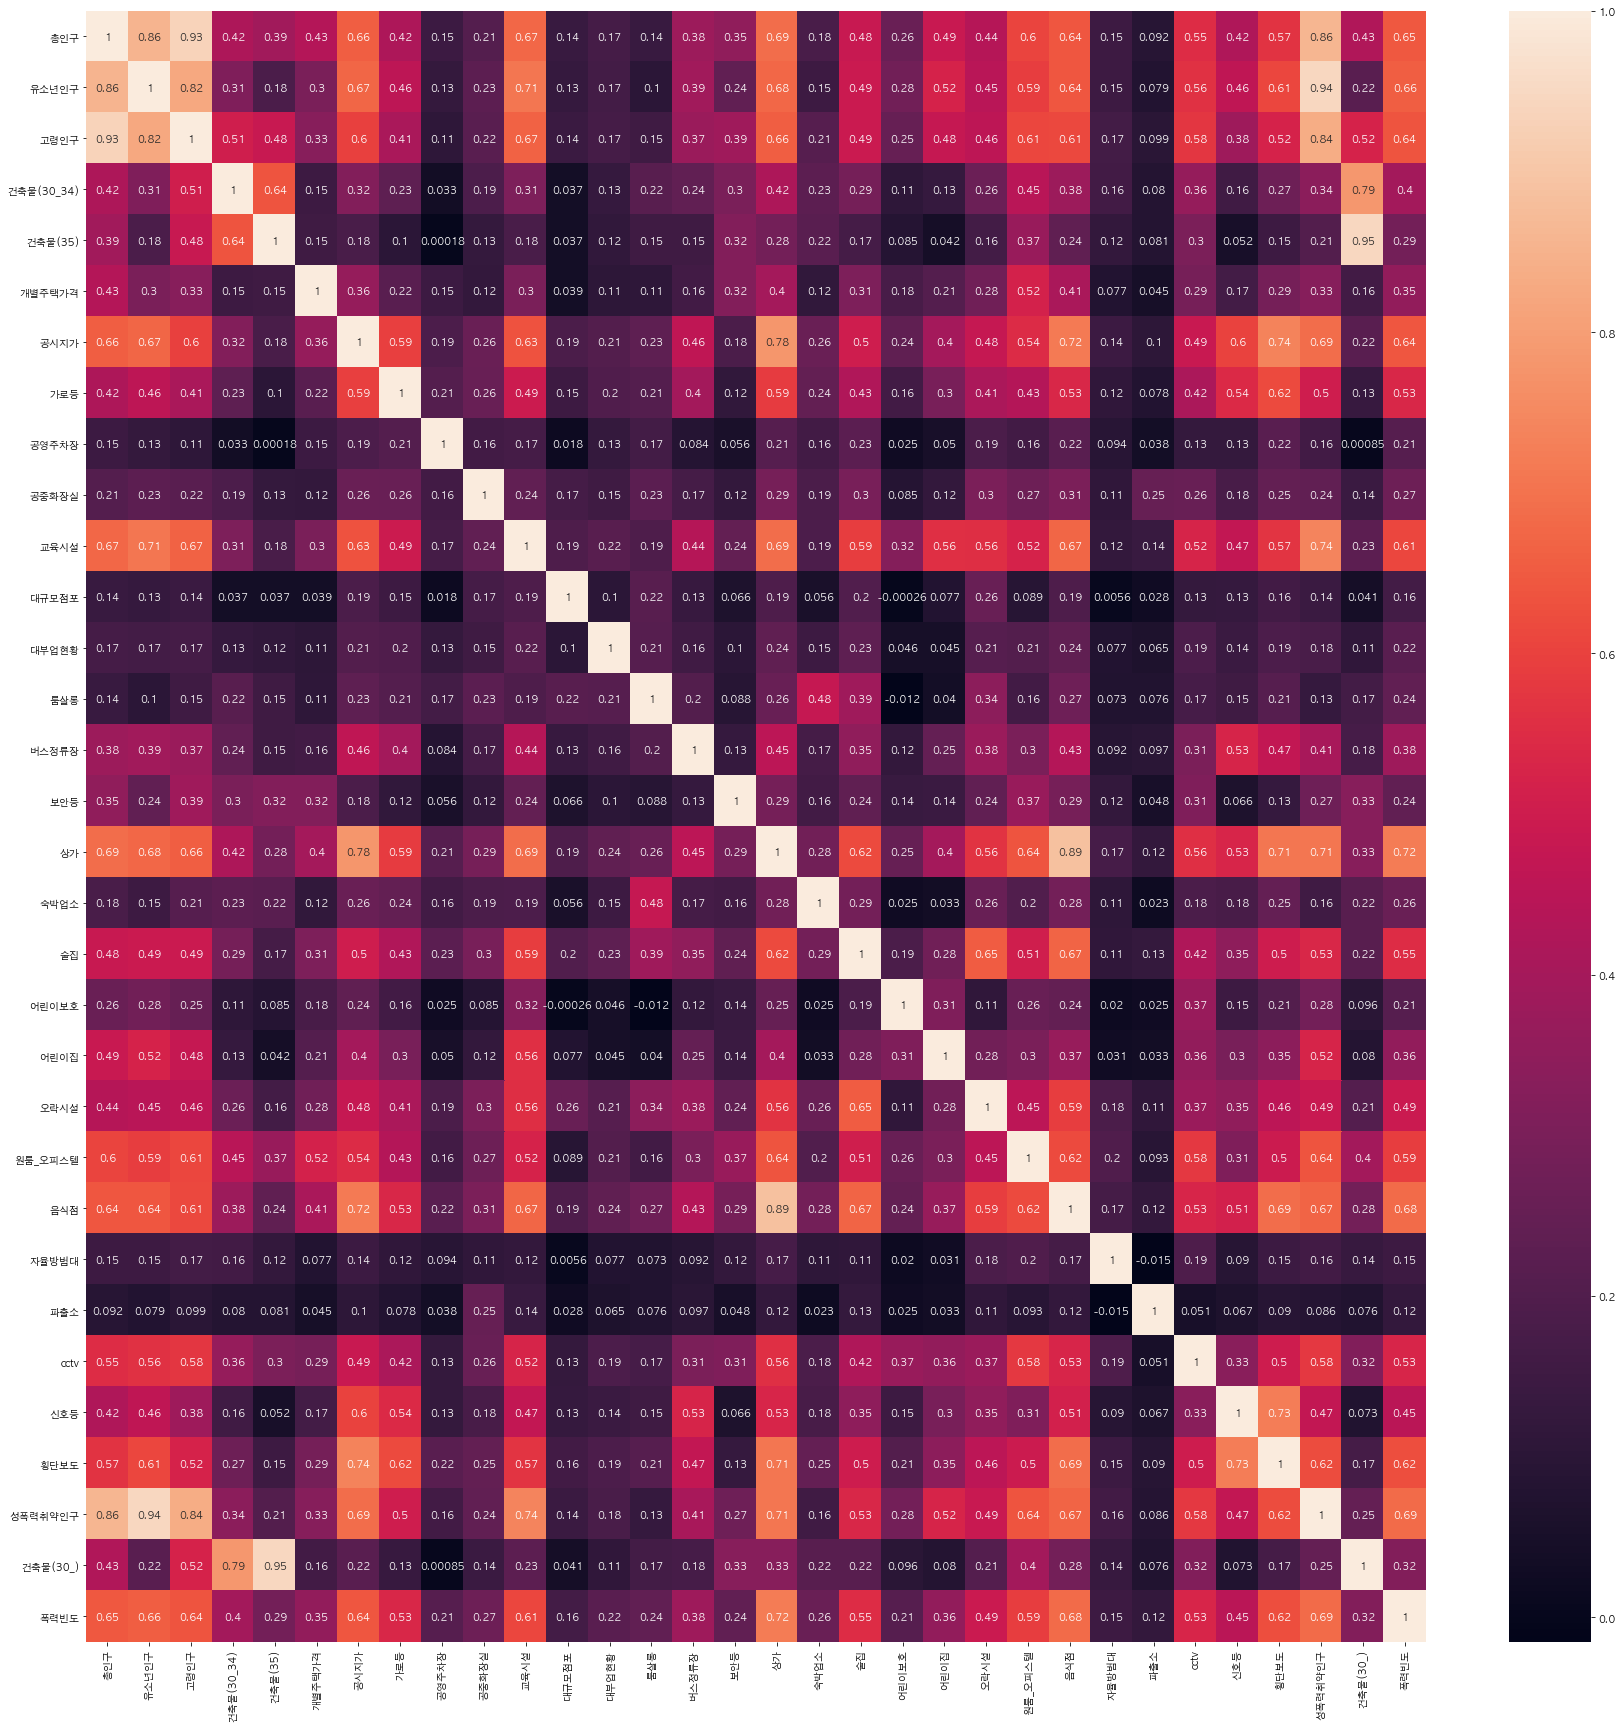

In [1211]:
plt.figure(figsize=(30, 30))
sns.heatmap(new_grid.drop(columns = ['GRADE_폭력','GRADE_절도','GRADE_성폭력']).corr(method = 'spearman'), annot=True)
plt.show()

In [1212]:
numerical_feats = new_grid.dtypes[new_grid.dtypes != "object"].index.tolist()
numerical_feats.remove('GRADE_폭력')
numerical_feats.remove('GRADE_절도')
numerical_feats.remove('GRADE_성폭력')
numerical_feats.remove('폭력빈도')
print("Number of Numerical features: ", len(numerical_feats))

categorical_feats = new_grid.dtypes[new_grid.dtypes == "object"].index.tolist()
print("Number of Categorical features: ", len(categorical_feats))

Number of Numerical features:  31
Number of Categorical features:  2


In [1213]:
scaler = StandardScaler()
new_grid[numerical_feats] = scaler.fit_transform(new_grid[numerical_feats])

In [1231]:
feature_list = list(new_grid.drop(columns = ['행정동코드','ID','GRADE_절도','GRADE_성폭력','GRADE_폭력','폭력빈도']).columns)
feature = new_grid[feature_list]
target = new_grid[['폭력빈도']]

In [1232]:
print(len(new_grid[new_grid['폭력빈도']==3]),len(new_grid[new_grid['GRADE_폭력']==8]),len(new_grid[new_grid['GRADE_폭력']==9]),len(new_grid[new_grid['GRADE_폭력']==10]))

14 5 3 6


In [1233]:
new_grid['GRADE_폭력'].value_counts()

0     1157
1      326
3      152
4      128
2      112
5       79
6       45
7       25
10       6
8        5
9        3
Name: GRADE_폭력, dtype: int64

In [1234]:
new_grid['폭력빈도'].value_counts()

1    1747
2     277
3      14
Name: 폭력빈도, dtype: int64

In [1235]:
model = LogisticRegression(random_state=0, solver ='lbfgs', multi_class='multinomial')
model.fit(X=feature, y=target) # 학습수행 
y_pred = model.predict(X = feature)
acc=accuracy_score(target,y_pred)
print('accuracy =', acc) 
con_mat = confusion_matrix(y_true=target, y_pred=y_pred) 
con_mat 

accuracy = 0.8974484789008832


array([[1683,   64,    0],
       [ 142,  134,    1],
       [   1,    1,   12]])

In [1236]:
from sklearn.metrics import classification_report
model.fit(X=feature, y=target) # 학습수행 
y_pred = model.predict(X = feature)
print(classification_report(target, y_pred))

              precision    recall  f1-score   support

           1       0.92      0.96      0.94      1747
           2       0.67      0.48      0.56       277
           3       0.92      0.86      0.89        14

    accuracy                           0.90      2038
   macro avg       0.84      0.77      0.80      2038
weighted avg       0.89      0.90      0.89      2038



In [1220]:
from sklearn.model_selection import KFold

scores = np.zeros(5)
cv = KFold(5, shuffle=True, random_state=0)
for i, (idx_train, idx_test) in enumerate(cv.split(new_grid)):
    df_train = new_grid.iloc[idx_train]
    df_test = new_grid.iloc[idx_test]
    feature_list = list(new_grid.drop(columns = ['행정동코드','ID','GRADE_절도','GRADE_성폭력','GRADE_폭력','폭력빈도']).columns)
    feature = df_train[feature_list]
    target = df_train[['폭력빈도']]
    
    
    model = LogisticRegression(random_state=0, solver ='lbfgs', multi_class='multinomial')
    model.fit(X=feature, y=target) # 학습수행 
    y_pred1 = model.predict(X = feature)
    y_pred2 = model.predict(X = df_test[feature_list])
    acc_1=accuracy_score(target,y_pred1)
    acc_2=accuracy_score(df_test['폭력빈도'],y_pred2)
    
    scores[i] = acc_2
    print("학습 Accuracy = {:.8f}, 검증 Accuracy = {:.8f}".format(acc_1, acc_2))
print(scores)
scores.mean()

학습 Accuracy = 0.77239264, 검증 Accuracy = 0.76470588
학습 Accuracy = 0.78773006, 검증 Accuracy = 0.73039216
학습 Accuracy = 0.76809816, 검증 Accuracy = 0.77205882
학습 Accuracy = 0.77437155, 검증 Accuracy = 0.74692875
학습 Accuracy = 0.77314531, 검증 Accuracy = 0.73710074
[0.76470588 0.73039216 0.77205882 0.74692875 0.73710074]


0.7502372693549164

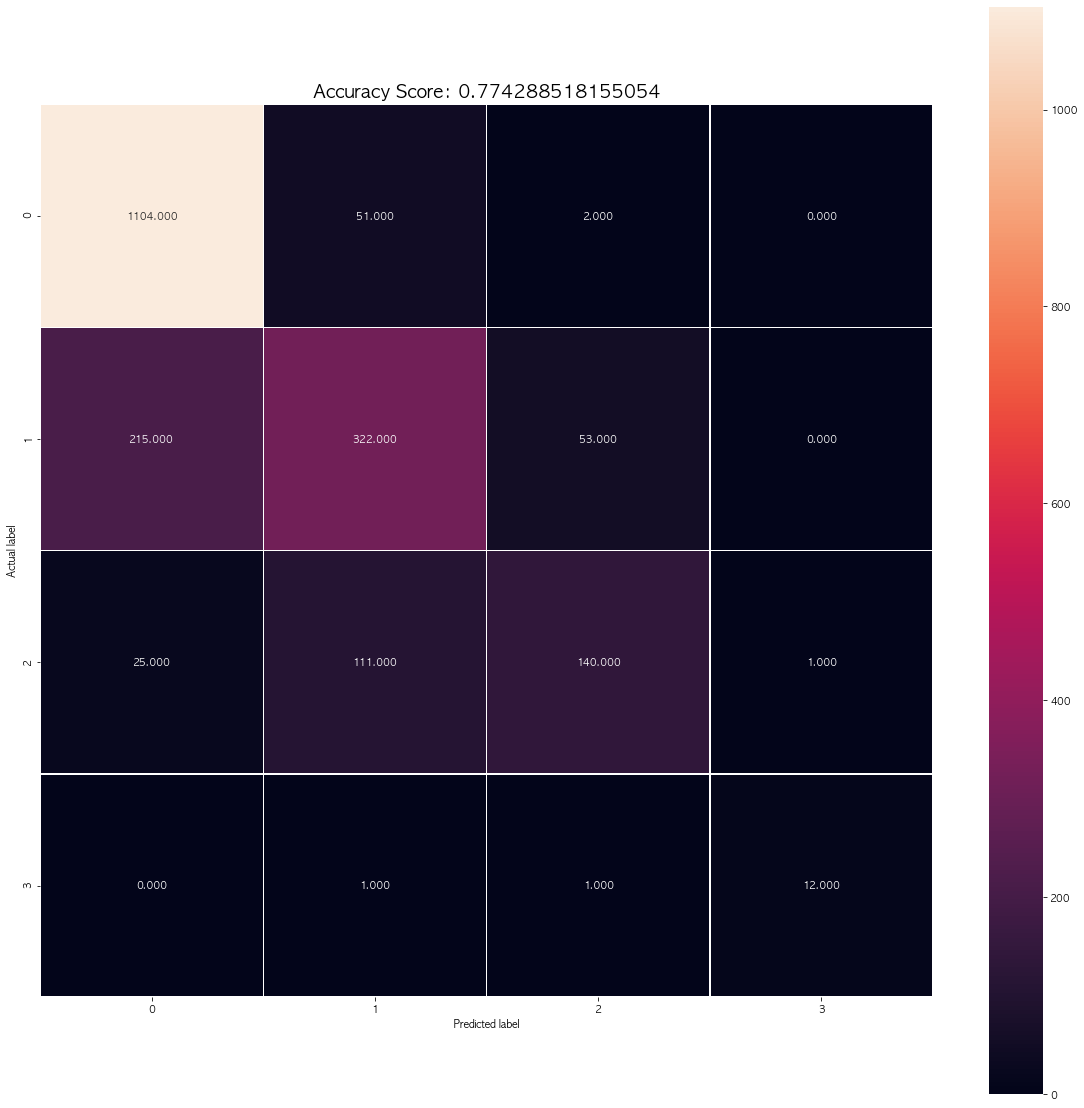

In [1221]:
plt.figure(figsize=(20,20)) # chart size 
sns.heatmap(con_mat, annot=True, fmt=".3f", linewidths=.5, square = True);# , cmap = 'Blues_r' : map »ö»ó  
plt.ylabel('Actual label'); 
plt.xlabel('Predicted label'); 
all_sample_title = 'Accuracy Score: {0}'.format(acc) 
plt.title(all_sample_title, size = 18) 
plt.show() 

In [1222]:
new_grid['폭력빈도'] = 0

In [1223]:
#new_grid.loc[(new_grid['GRADE_폭력']==0),'폭력빈도'] = 0
new_grid.loc[(new_grid['GRADE_폭력']>=0)&(new_grid['GRADE_폭력']<4),'폭력빈도'] = 1
new_grid.loc[(new_grid['GRADE_폭력']>=4)&(new_grid['GRADE_폭력']<8),'폭력빈도'] = 2
new_grid.loc[(new_grid['GRADE_폭력']>=8)&(new_grid['GRADE_폭력']<11),'폭력빈도'] = 3

In [1224]:
new_grid['폭력빈도'].value_counts()

1    1747
2     277
3      14
Name: 폭력빈도, dtype: int64

In [1229]:
target = new_grid[['폭력빈도']]

In [1230]:
model = LogisticRegression(random_state=0, solver ='lbfgs', multi_class='multinomial')
model.fit(X=feature, y=target) # 학습수행 
y_pred = model.predict(X = feature)
acc=accuracy_score(target,y_pred)
print('accuracy =', acc) 
con_mat = confusion_matrix(y_true=target, y_pred=y_pred) 
con_mat 

ValueError: Found input variables with inconsistent numbers of samples: [1631, 2038]

In [1226]:
from sklearn.metrics import classification_report
model.fit(X=feature, y=target) # 학습수행 
y_pred = model.predict(X = feature)
print(classification_report(target, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88       929
           1       0.66      0.54      0.59       470
           2       0.71      0.53      0.60       226
           3       1.00      1.00      1.00         6

    accuracy                           0.77      1631
   macro avg       0.80      0.75      0.77      1631
weighted avg       0.76      0.77      0.76      1631



In [1227]:
from sklearn.model_selection import KFold

scores = np.zeros(5)
cv = KFold(5, shuffle=True, random_state=0)
for i, (idx_train, idx_test) in enumerate(cv.split(new_grid)):
    df_train = new_grid.iloc[idx_train]
    df_test = new_grid.iloc[idx_test]
    feature_list = list(new_grid.drop(columns = ['행정동코드','ID','GRADE_절도','GRADE_성폭력','GRADE_폭력','폭력빈도']).columns)
    feature = df_train[feature_list]
    target = df_train[['폭력빈도']]
    
    
    model = LogisticRegression(random_state=0, solver ='lbfgs', multi_class='multinomial')
    model.fit(X=feature, y=target) # 학습수행 
    y_pred1 = model.predict(X = feature)
    y_pred2 = model.predict(X = df_test[feature_list])
    acc_1=accuracy_score(target,y_pred1)
    acc_2=accuracy_score(df_test['폭력빈도'],y_pred2)
    
    scores[i] = acc_2
    print("학습 Accuracy = {:.8f}, 검증 Accuracy = {:.8f}".format(acc_1, acc_2))
print(scores)
scores.mean()

학습 Accuracy = 0.89754601, 검증 Accuracy = 0.89215686
학습 Accuracy = 0.90552147, 검증 Accuracy = 0.87745098
학습 Accuracy = 0.89570552, 검증 Accuracy = 0.88970588
학습 Accuracy = 0.90067443, 검증 Accuracy = 0.89189189
학습 Accuracy = 0.90128755, 검증 Accuracy = 0.89189189
[0.89215686 0.87745098 0.88970588 0.89189189 0.89189189]


0.888619501854796

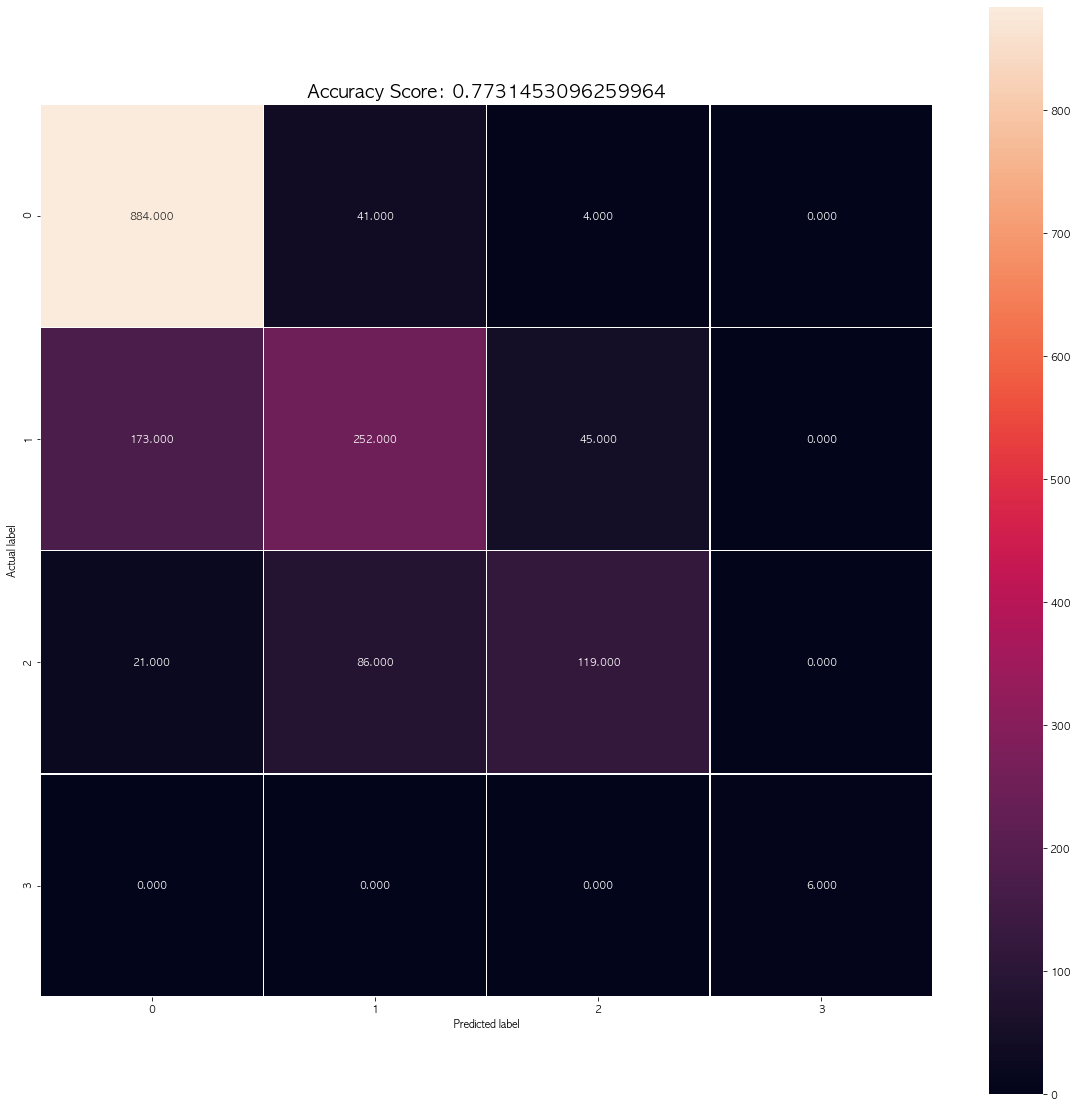

In [1228]:
plt.figure(figsize=(20,20)) # chart size 
sns.heatmap(con_mat, annot=True, fmt=".3f", linewidths=.5, square = True);# , cmap = 'Blues_r' : map »ö»ó  
plt.ylabel('Actual label'); 
plt.xlabel('Predicted label'); 
all_sample_title = 'Accuracy Score: {0}'.format(acc) 
plt.title(all_sample_title, size = 18) 
plt.show() 